# Boston Housing Price Prediction (Multi-Feature Regression)

## Objective
Use multiple variables to predict house price (medv).

## Features Used
- rm (average rooms per house)
- lstat (% low-income residents)
- ptratio (pupil-teacher ratio)

## Model & Evaluation
- LinearRegression (scikit-learn)
- RMSE: 5.2072024557895356
- R² Score: 0.6302528487272828

## Insights
- More rooms → higher price
- Higher lstat or ptratio → lower price
- Multiple features give better results than one

## Visuals
- Correlation heatmap
- Residual plot


In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [7]:
#loading data and exploring
df = pd.read_csv("boston.csv")
print(df.head())
print("\n", df.info())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float6

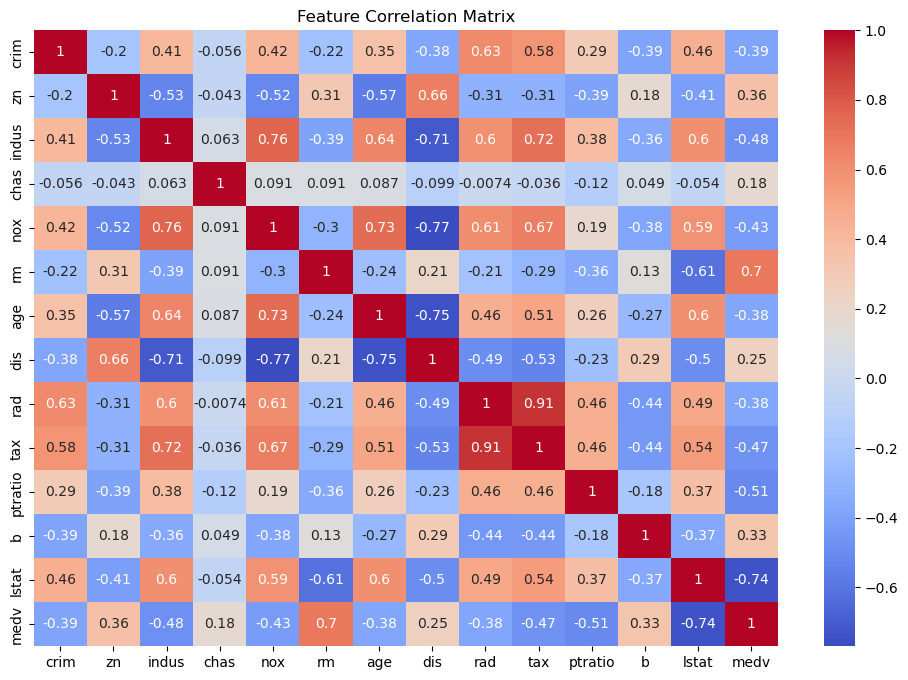

In [32]:
#correlation heatmap : to choose the best features
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

In [13]:
X = df[['rm', 'lstat', 'ptratio']]   # Features
y = df['medv']                       # Target

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = model.predict(X_test)

In [21]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [23]:
print("MSE:", mse)
print("RMSE:", np.sqrt(mse))
print("R² Score:", r2)

MSE: 27.114957415580573
RMSE: 5.2072024557895356
R² Score: 0.6302528487272828


In [25]:
residuals = y_test - y_pred

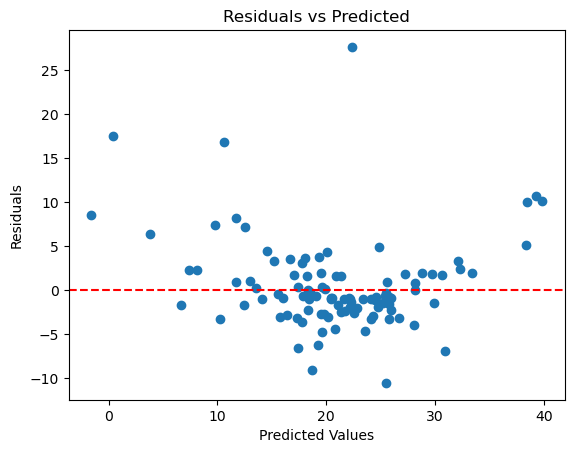

In [27]:
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()